In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
X, y = make_moons(n_samples = 1000, noise = 0.2, random_state = 33)

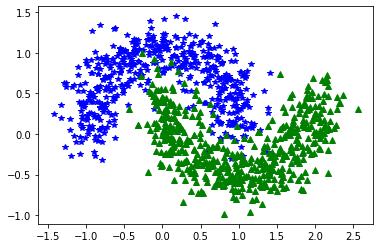

In [3]:
plt.plot(X[y == 0, 0], X[y == 0, 1], 'b*')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'g^')

In [4]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting = 'hard'
)

# voting_clf.fit(X, y)

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [7]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.845
RandomForestClassifier 0.9575
SVC 0.96
VotingClassifier 0.96


In [8]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability = True)

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rnd', rnd_clf), ('svm', svm_clf)],
    voting = 'soft',
)

# voting_clf.fit(X_train, y_train)

In [9]:
for clf in [log_clf, rnd_clf, svm_clf, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.845
RandomForestClassifier 0.9575
SVC 0.96
VotingClassifier 0.9625
